In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sci
from utils import *
import kedro.framework.context

plt.rcParams["figure.figsize"] = (16,9)
sns.set(font_scale=1.6)
sns.set_style("whitegrid")

In [3]:
df = context.catalog.load("fire_data_with_foehn_and_control_variables")

2021-02-23 13:38:46,500 - kedro.io.data_catalog - INFO - Loading data from `fire_data_with_foehn_and_control_variables` (CSVDataSet)...


In [4]:
foehn_prevalence_fire_start = (df["foehn_minutes_during_12_hours_after_start_of_fire"] >60).sum()/df["foehn_minutes_during_12_hours_after_start_of_fire"].count()
#foehn_prevalence_before_fire_start = (df_final["foehn_minutes_24_hour_before"] >60).sum()/df_final["foehn_minutes_24_hour_before"].count()

print(f"Foehn prevalent after start of fire (%): {foehn_prevalence_fire_start}")
#print(f"Foehn prevalent before start of fire (%): {foehn_prevalence_before_fire_start}")

Foehn prevalent after start of fire (%): 0.24174843889384479


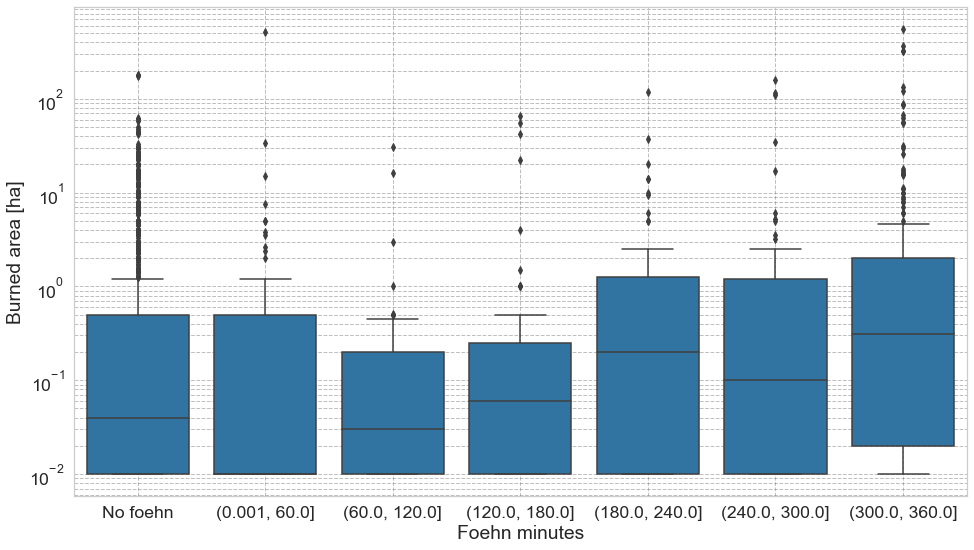

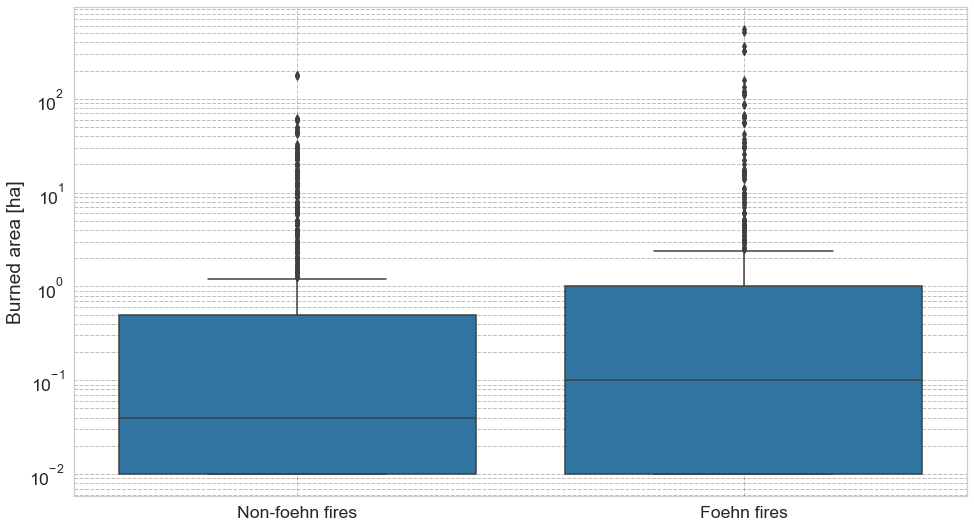

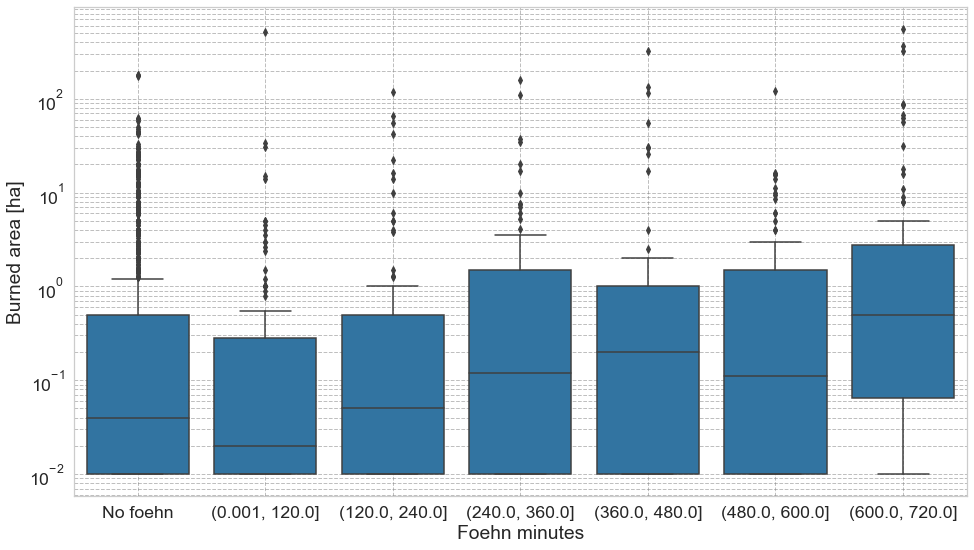

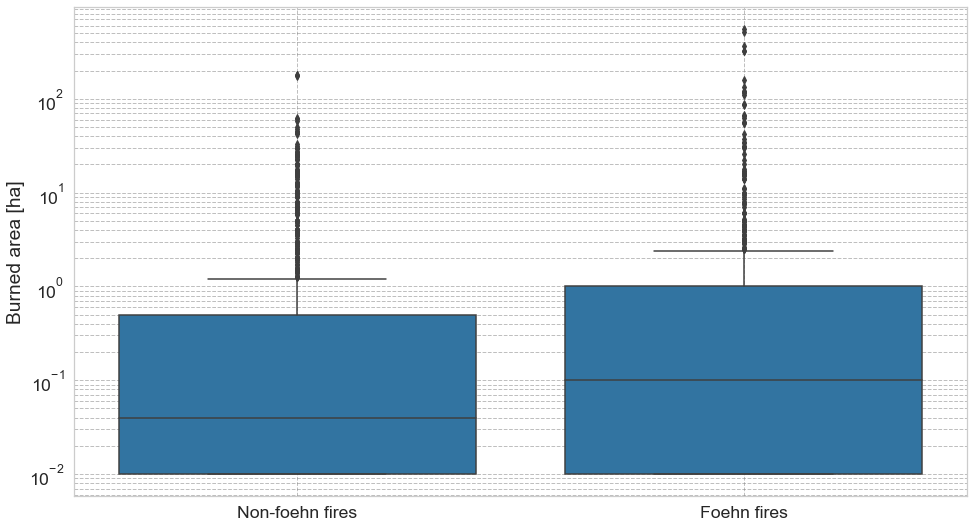

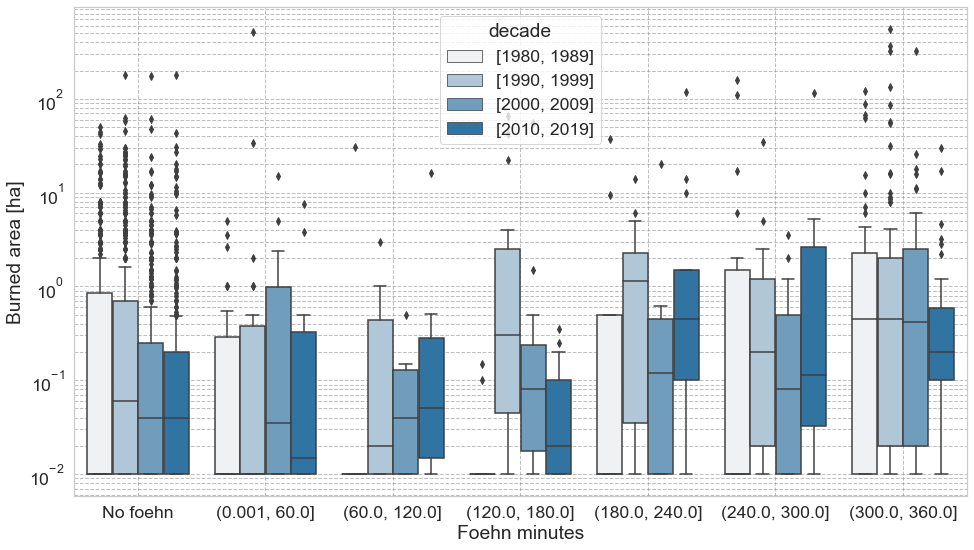

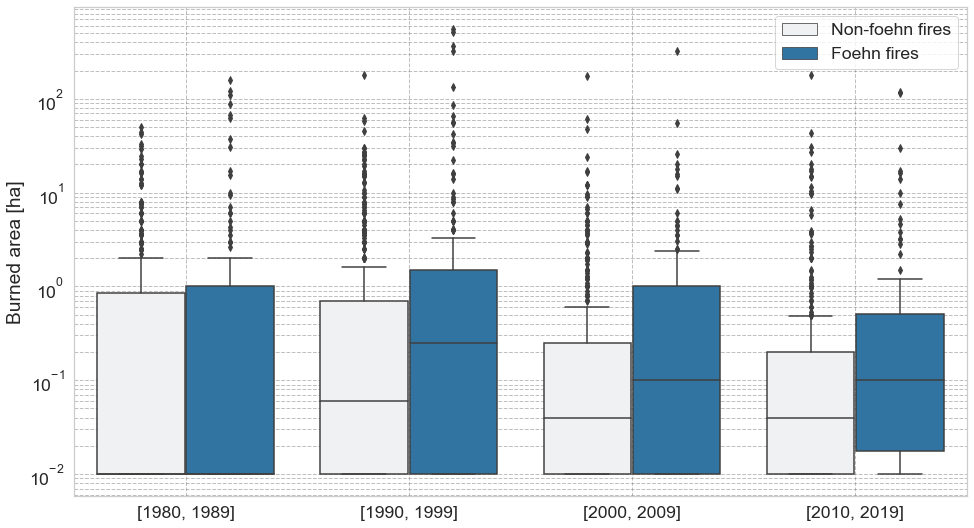

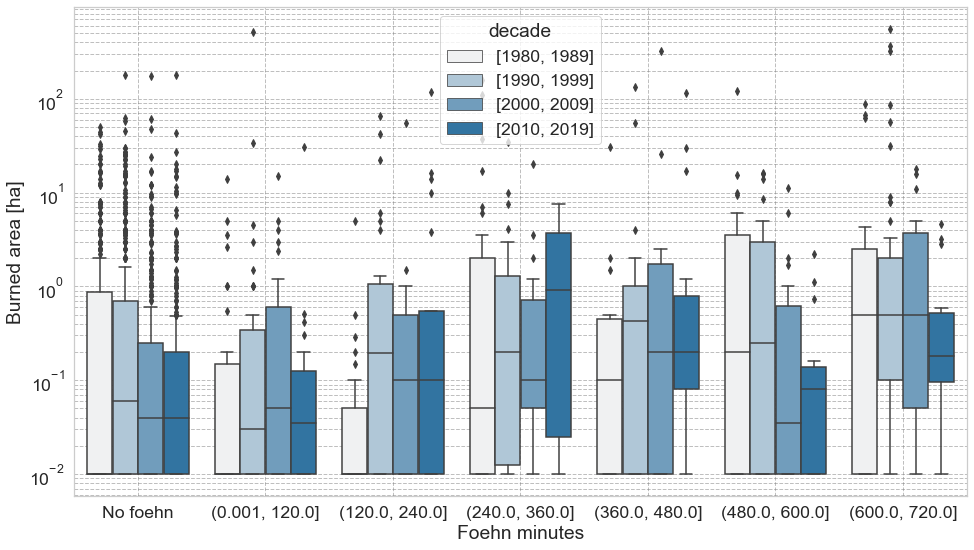

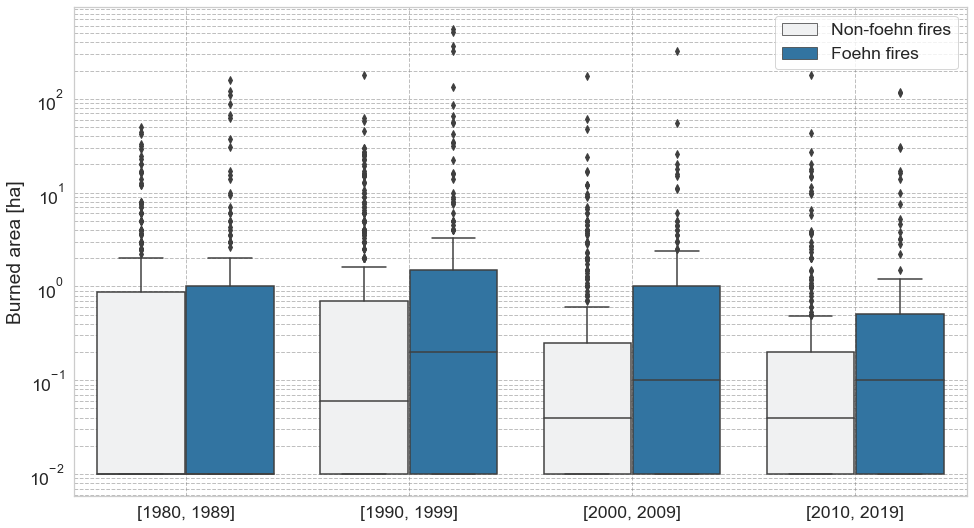

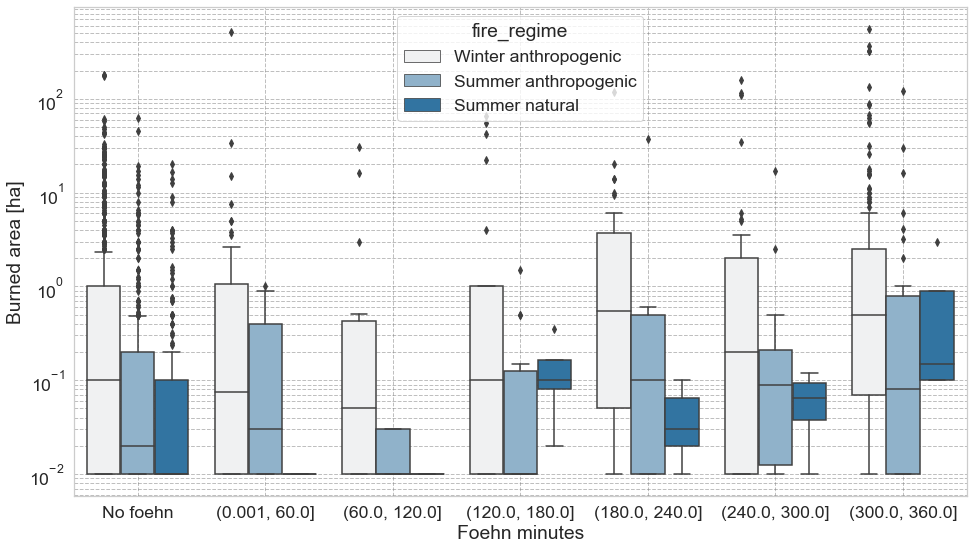

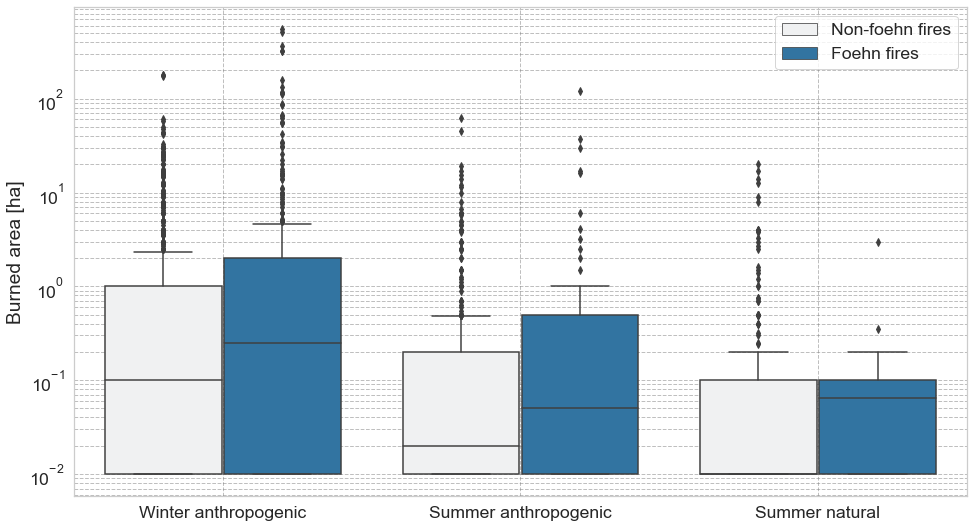

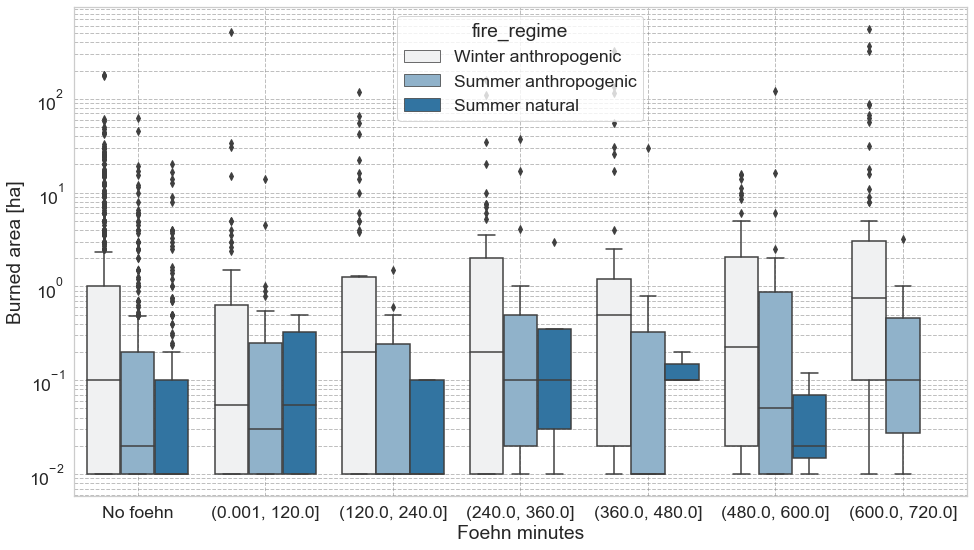

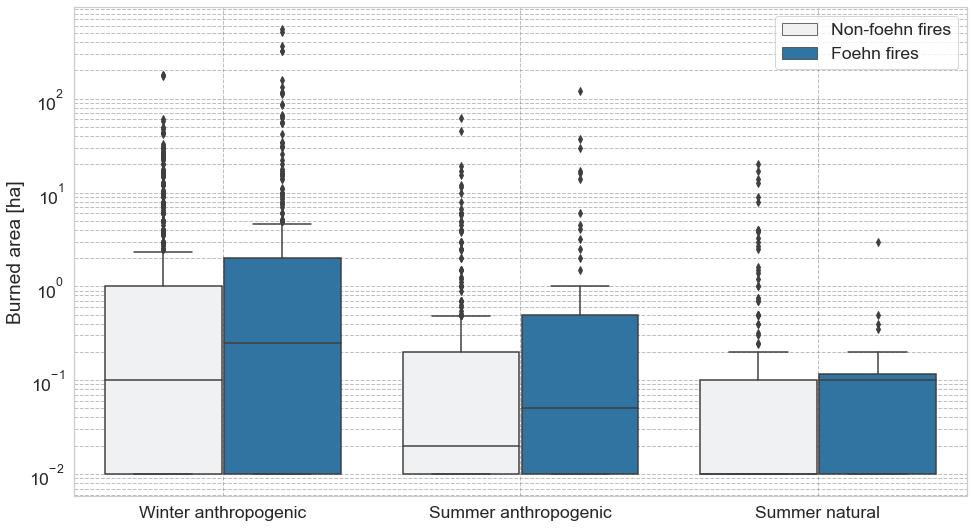

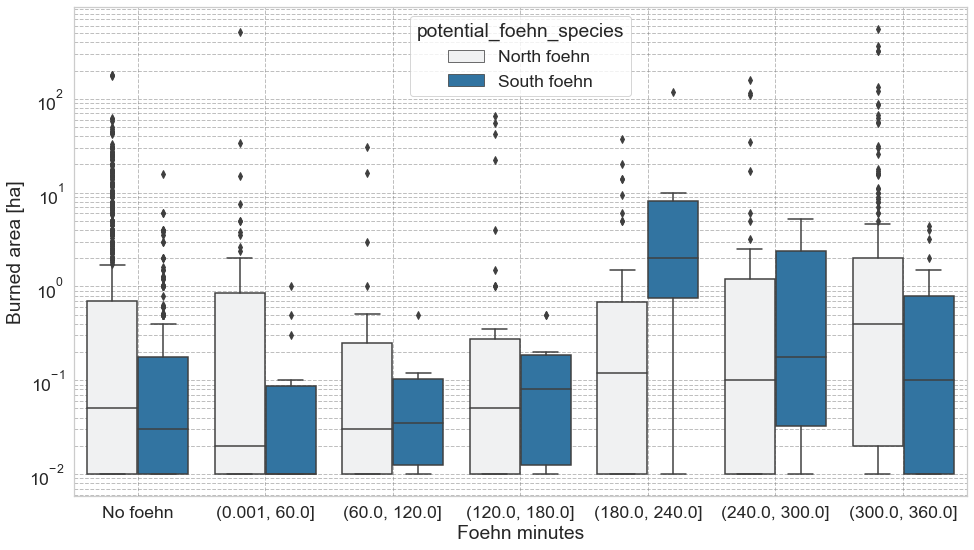

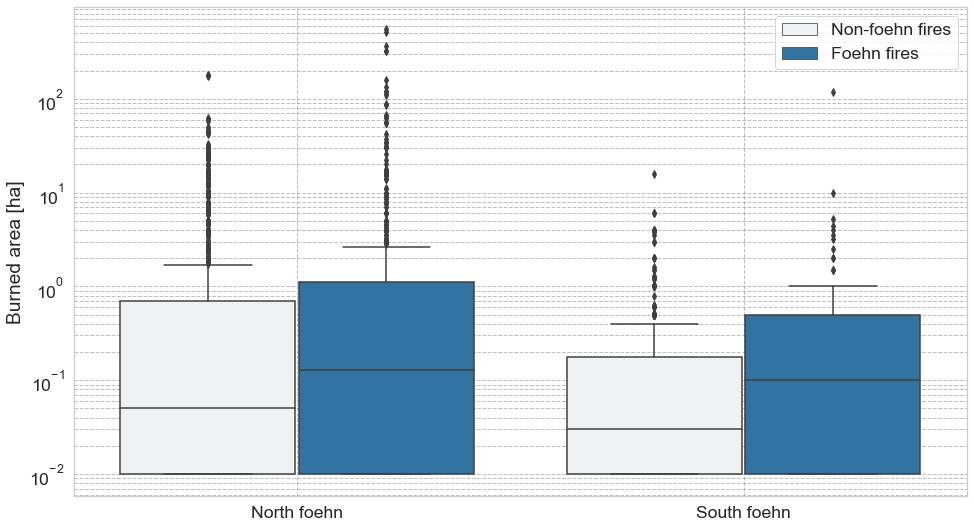

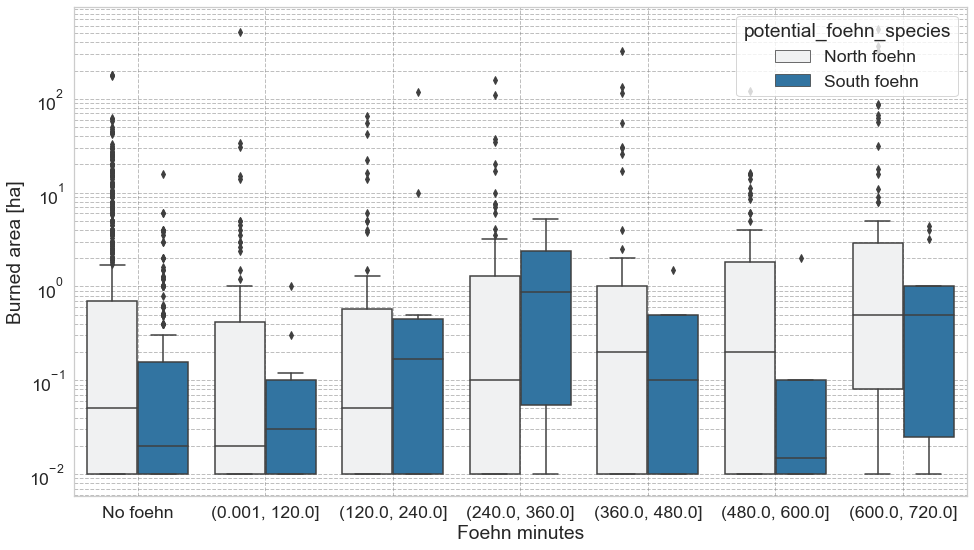

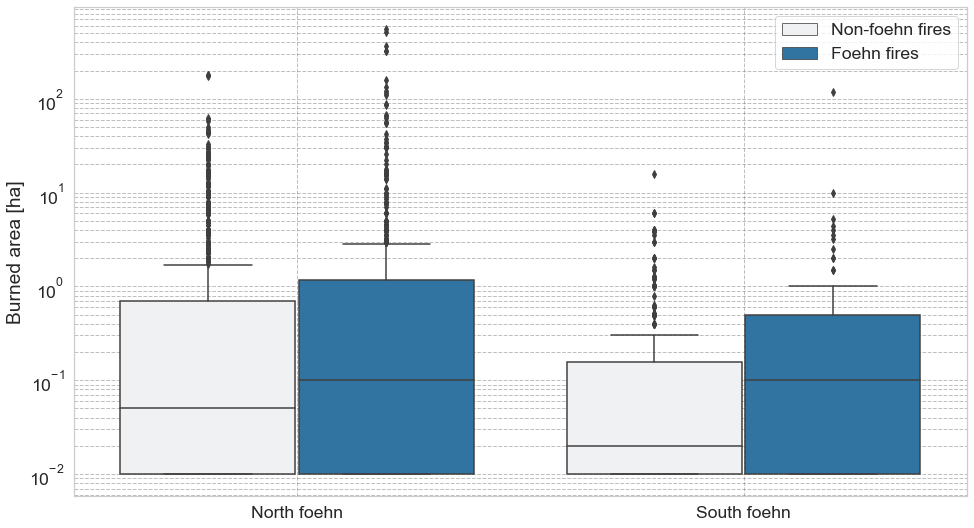

In [5]:
# Plot all (or selected) plots for 6 and 12 hours after fire start
for var in ["", "decade", "fire_regime", "potential_foehn_species"]:
    for hours in [6,12]:
        plot_multiple_binned_burned_area_after_fire_start(df, hours=hours, control_var=var)
        plot_binary_binned_burned_area_after_fire_start(df, hours=hours,control_var=var)

# Statistical significance tests

In [41]:
test_multiple_bins_against_no_foehn(df, hours=12)

No-foehn vs. (0.001, 120.0] 	 0.393073 	 0.5
No-foehn vs. (120.0, 240.0] 	 0.576637 	 1.25
No-foehn vs. (240.0, 360.0] 	 0.003061 	 3.0
No-foehn vs. (360.0, 480.0] 	 0.00489 	 5.0
No-foehn vs. (480.0, 600.0] 	 0.014831 	 2.75
No-foehn vs. (600.0, 720.0] 	 0.0 	 12.5


In [7]:
# All fires
for hours in [6,12]:
    test_binary_bins(df, hours=hours)

(6h) non-foehn vs. foehn  7.769156296553956e-08 	 2.5
(12h) non-foehn vs. foehn  1.8281220262657264e-07 	 2.5


In [8]:
control_var_categories = {"": "",
                          "fire_regime": ["Winter anthropogenic", "Summer anthropogenic", "Summer natural"], 
                          "decade": ["[1980, 1989]", "[1990, 1999]","[2000, 2009]","[2010, 2019]"],
                          "potential_foehn_species": ["North foehn", "South foehn"]}

In [9]:
# For different fire regimes regimes
var = "fire_regime"
for hours in [6,12]:
    test_binary_bins(df, hours=hours, control_var=var, categories = control_var_categories[var])

(6h) non-foehn vs. foehn for Winter anthropogenic 	 6e-05 	 2.5
(6h) non-foehn vs. foehn for Summer anthropogenic 	 0.214605 	 2.5
(6h) non-foehn vs. foehn for Summer natural 	 0.452882 	 6.5
(12h) non-foehn vs. foehn for Winter anthropogenic 	 0.000108 	 2.5
(12h) non-foehn vs. foehn for Summer anthropogenic 	 0.16377 	 2.5
(12h) non-foehn vs. foehn for Summer natural 	 0.219199 	 10.0


In [10]:
# For different foehn types
var = "potential_foehn_species"
for hours in [6,12]:
    test_binary_bins(df, hours=hours, control_var=var, categories = control_var_categories[var])

(6h) non-foehn vs. foehn for North foehn 	 9e-06 	 2.6
(6h) non-foehn vs. foehn for South foehn 	 0.014481 	 3.33
(12h) non-foehn vs. foehn for North foehn 	 1.6e-05 	 2.0
(12h) non-foehn vs. foehn for South foehn 	 0.013292 	 5.0


In [11]:
# Test for significant difference between North and South Foehn
var = "potential_foehn_species"
for hours in [6,12]:
    test_foehn_within_variable(df, hours=hours, control_var=var, categories = control_var_categories[var])

(6h)  North foehn  vs.  South foehn 	 0.144508 	 1.3
(12h)  North foehn  vs.  South foehn 	 0.103341 	 1.0


In [12]:
# For different decades
var = "decade"
for hours in [6,12]:
    test_binary_bins(df, hours=hours, control_var=var, categories = control_var_categories[var])

(6h) non-foehn vs. foehn for [1980, 1989] 	 0.436972 	 1.0
(6h) non-foehn vs. foehn for [1990, 1999] 	 0.000248 	 4.17
(6h) non-foehn vs. foehn for [2000, 2009] 	 0.001104 	 2.5
(6h) non-foehn vs. foehn for [2010, 2019] 	 0.002752 	 2.5
(12h) non-foehn vs. foehn for [1980, 1989] 	 0.436701 	 1.0
(12h) non-foehn vs. foehn for [1990, 1999] 	 0.000762 	 3.33
(12h) non-foehn vs. foehn for [2000, 2009] 	 0.000576 	 2.5
(12h) non-foehn vs. foehn for [2010, 2019] 	 0.004247 	 2.5


In [13]:
# Test for significant difference in foehn between decades
var = "decade"
for hours in [6,12]:
    test_foehn_within_variable(df, hours=hours, control_var=var, categories = control_var_categories[var])

(6h)  [1980, 1989]  vs.  [1990, 1999] 	 0.002992 	 0.04
(6h)  [1980, 1989]  vs.  [2000, 2009] 	 0.076057 	 0.1
(6h)  [1980, 1989]  vs.  [2010, 2019] 	 0.117994 	 0.1
(6h)  [1990, 1999]  vs.  [2000, 2009] 	 0.157999 	 2.5
(6h)  [1990, 1999]  vs.  [2010, 2019] 	 0.136796 	 2.5
(6h)  [2000, 2009]  vs.  [2010, 2019] 	 0.999179 	 1.0
(12h)  [1980, 1989]  vs.  [1990, 1999] 	 0.0034 	 0.05
(12h)  [1980, 1989]  vs.  [2000, 2009] 	 0.054171 	 0.1
(12h)  [1980, 1989]  vs.  [2010, 2019] 	 0.112054 	 0.1
(12h)  [1990, 1999]  vs.  [2000, 2009] 	 0.259276 	 2.0
(12h)  [1990, 1999]  vs.  [2010, 2019] 	 0.176488 	 2.0
(12h)  [2000, 2009]  vs.  [2010, 2019] 	 0.871504 	 1.0


# Test for wind strength after start

564
(6h)  (2.5, 14.9]  vs.  (14.9, 27.6] 	 0.003693 	 4.0
(6h)  (2.5, 14.9]  vs.  (27.6, 52.0] 	 0.00358 	 10.0
(6h)  (14.9, 27.6]  vs.  (27.6, 52.0] 	 0.160623 	 2.5
612
(12h)  (1.0, 10.7]  vs.  (10.7, 21.0] 	 0.021875 	 3.4
(12h)  (1.0, 10.7]  vs.  (21.0, 52.0] 	 0.005087 	 4.3
(12h)  (10.7, 21.0]  vs.  (21.0, 52.0] 	 0.178139 	 1.265


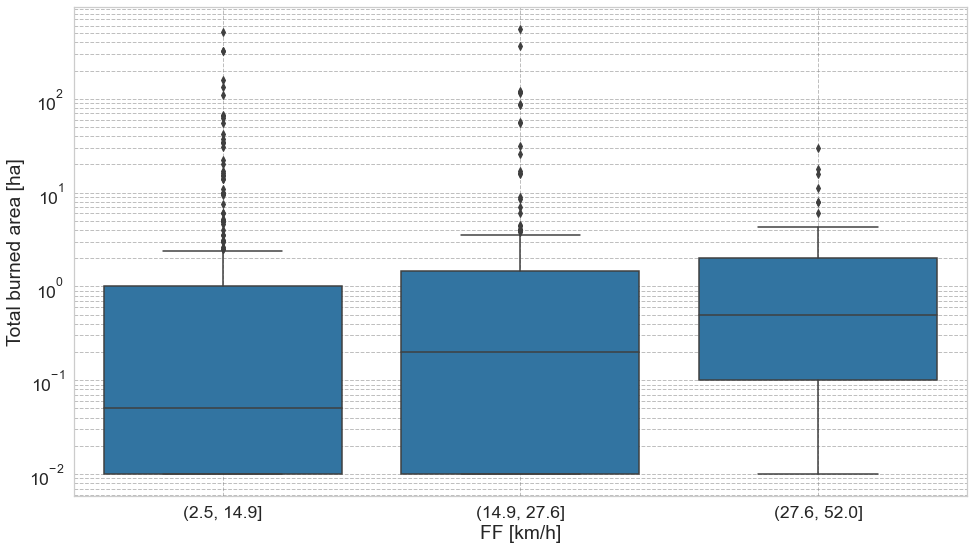

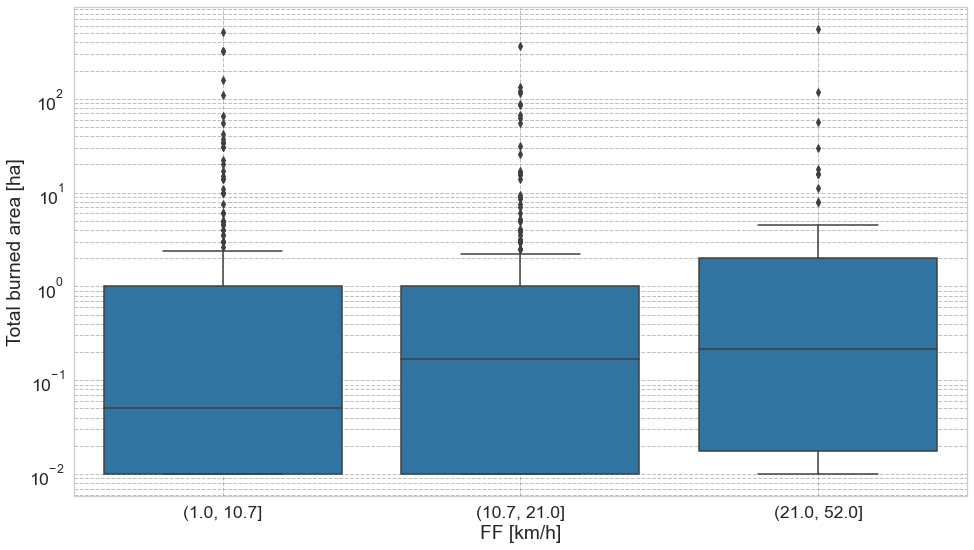

In [14]:
bins_dict = {6: [2.5,14.9,27.6,52], 12: [1,10.7,21,52]}
for hour in [6,12]:
    test_foehn_strength(df, hours=hour, strength_var="FF", bins=bins_dict[hour])

564
(6h)  (7.5, 27.0]  vs.  (27.0, 52.1] 	 0.000434 	 4.0
(6h)  (7.5, 27.0]  vs.  (52.1, 95.0] 	 0.000114 	 15.2
(6h)  (27.0, 52.1]  vs.  (52.1, 95.0] 	 0.06549 	 3.8
612
(12h)  (3, 21]  vs.  (21, 35] 	 0.087119 	 2.0
(12h)  (3, 21]  vs.  (35, 95] 	 0.00036 	 7.1
(12h)  (21, 35]  vs.  (35, 95] 	 0.021991 	 3.55


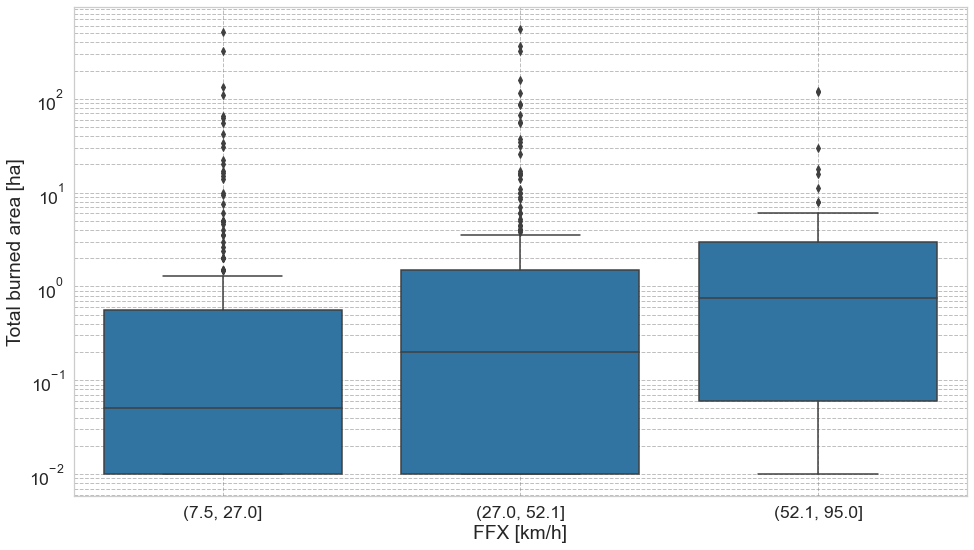

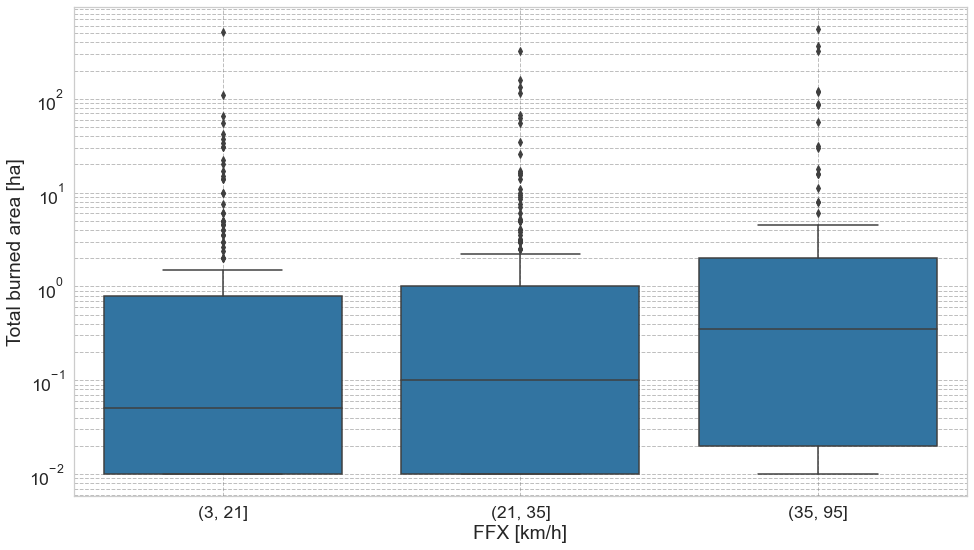

In [15]:
bins_dict = {6: [7.5,27,52.1,95], 12: [3,21,35,95]}
for hour in [6,12]:
    test_foehn_strength(df, hours=hour, strength_var="FFX", bins=bins_dict[hour])

# Before fire start

In [16]:
df_foehn = context.catalog.load("foehn_data_prepared")

2021-02-23 13:39:00,612 - kedro.io.data_catalog - INFO - Loading data from `foehn_data_prepared` (CSVDataSet)...


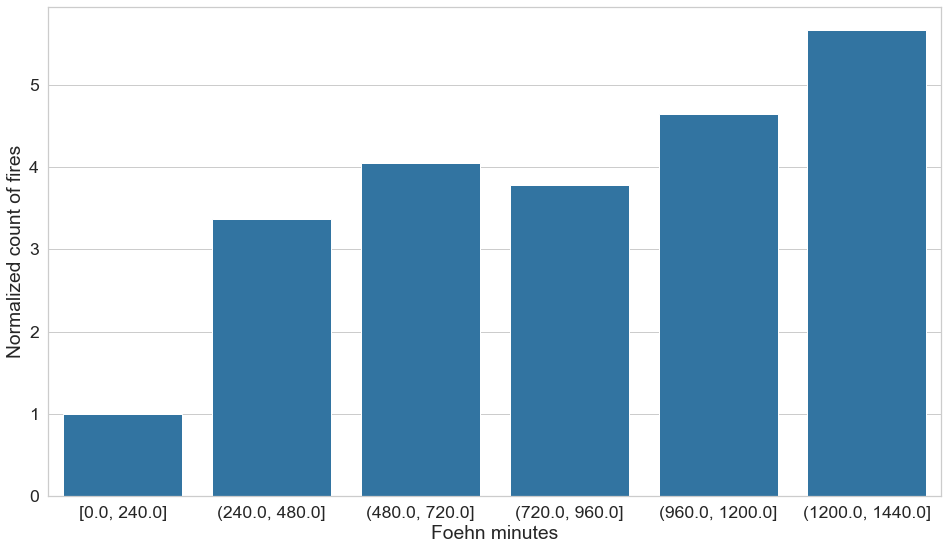

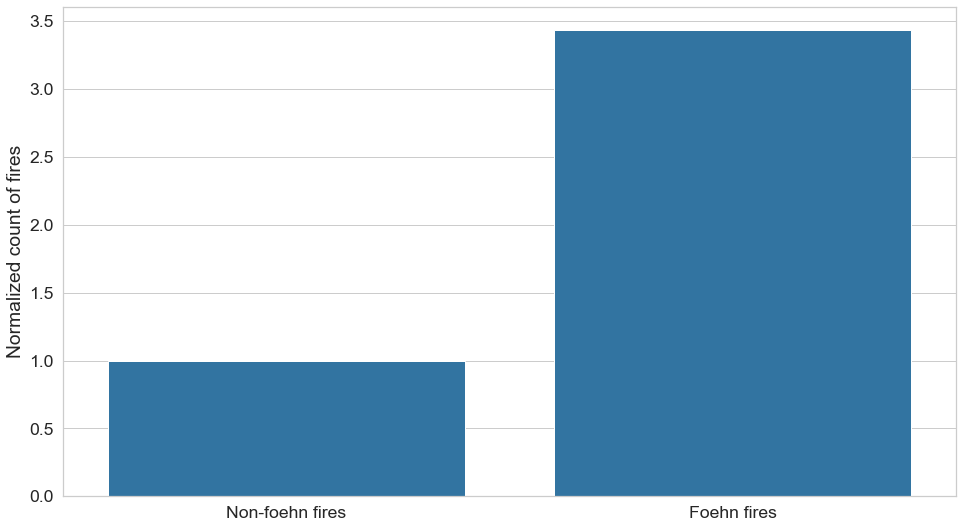

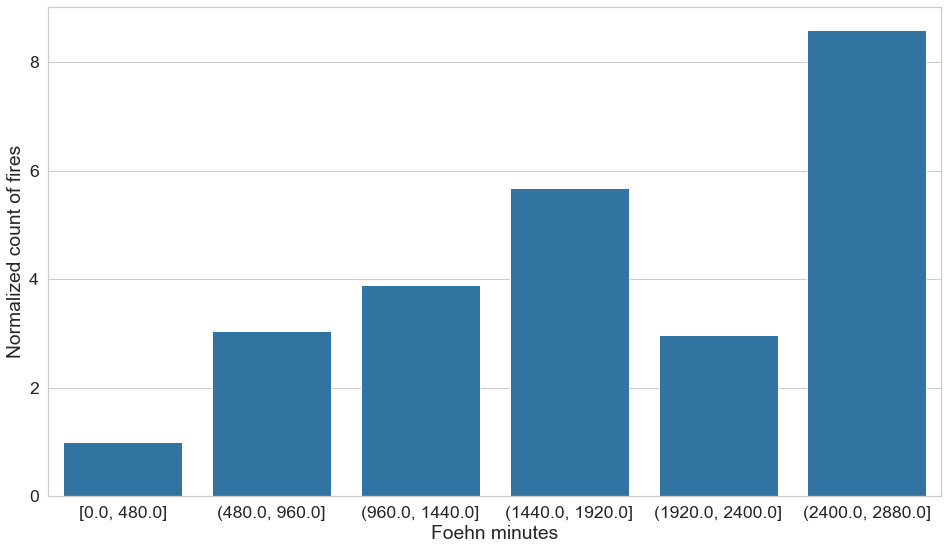

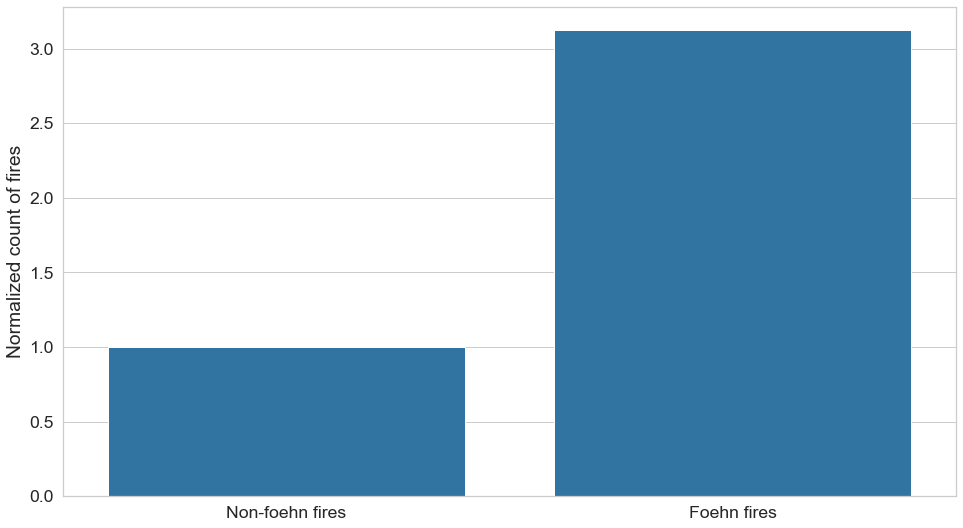

In [18]:
# Before fire start
for hour in [24,48]:
    plot_binned_burned_area_before_fire_start(df, df_foehn=df_foehn.filter(regex="foehn"), hours=hour)

In [26]:
stations = [colname[0:3] for colname in df_foehn.filter(regex="foehn").columns]
north_foehn_stations = ["LUG", "OTL", "MAG", "COM", "GRO", "SBO", "PIO", "CEV", "ROB", "VIO"]
south_foehn_stations = set(stations) - set(north_foehn_stations)

In [64]:
a = pd.Series([False, True])
a

0    False
1     True
dtype: bool

In [65]:
b = pd.Series([True]*4)
b

0    True
1    True
2    True
3    True
dtype: bool

In [66]:
a | b

0     True
1     True
2    False
3    False
dtype: bool

In [67]:
b | a

0    True
1    True
2    True
3    True
dtype: bool

In [68]:
a & b

0    False
1     True
2    False
3    False
dtype: bool

In [69]:
b & a

0    False
1     True
2    False
3    False
dtype: bool

TT_mean_24_hour_before
(0, 3]      175
(3, 6]      256
(6, 9]      188
(9, 12]      66
(12, 15]     11
Name: total [ha], dtype: int64
TT_mean_48_hour_before
(0, 3]      224
(3, 6]      368
(6, 9]      233
(9, 12]      77
(12, 15]     14
Name: total [ha], dtype: int64


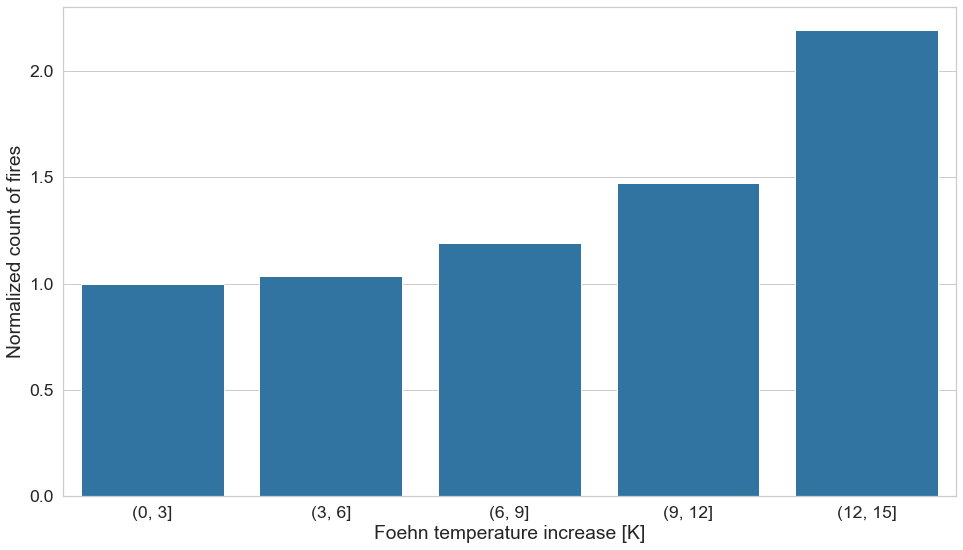

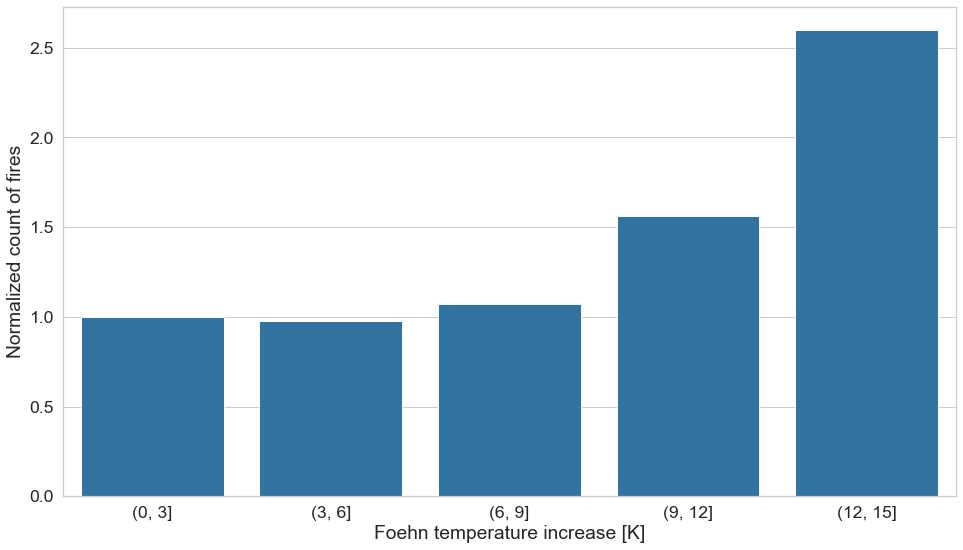

In [28]:
for hour in [24,48]:
    plot_binned_burned_area_before_fire_start_temperature(df, df_foehn, hours=hour, stations=north_foehn_stations)